# Riemann Sums

### Charlie Bailey (peba2926)

## Coding RIEMANN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# all three versions encapsulated in a single function
def riemann(a, b, func, how='Left', num_steps=4, plot=True):
    delta_x = (b - a) / num_steps
    x = a
    accum = 0
    x_pts = []
    y_pts = []
    
    for k in range(num_steps):
        # default is left if mid or right not explicitly specified
        if how == 'Left':
            y = func(x)
        elif how == 'Middle':
            y = func(x + delta_x/2)
        elif how == 'Right':
            y = func(x + delta_x)
        else:
            print("incorrect 'how' argument. Must be 'Left' (default), 'Right', or 'Middle'.")

        y_pts.append(y)
        x_pts.append(x)

        delta_S = y * delta_x
        accum = accum + delta_S
        x = x + delta_x
    
    if plot:
        x_pts = np.array(x_pts)
        y_pts - np.array(y_pts)
        func_x_pts = np.linspace(a, b, 1000)
        plt.plot(func_x_pts, func(func_x_pts), color='blue')
        # Credit: Nandini on piazza for bar graph idea!
        plt.bar(x_pts, y_pts, width=delta_x, align='edge', color='lightgray', edgecolor='gray')
        plt.title(f'{how} endpoint Riemann Sum w/ Accumulated Sum = {round(accum, 4)}')
    else:
        # report out the number of subintervals and final Riemann sum
        print(f'{how} endpoint Riemann Sum ::: {accum} with {k+1} subintervals.')


## Plots for each version

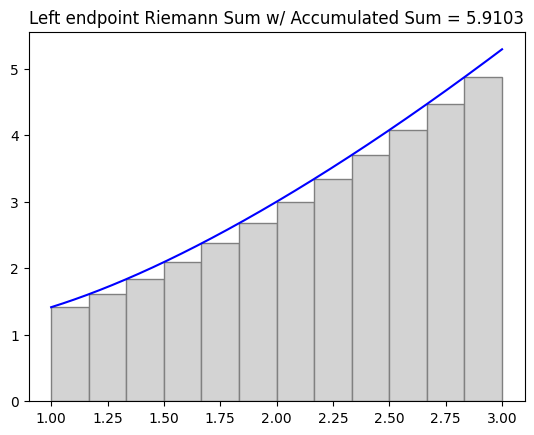

In [3]:
# Left endpoint version
fn = lambda x: np.sqrt(1 + x**3)
riemann(1, 3, fn, how='Left', num_steps=12, plot=True)

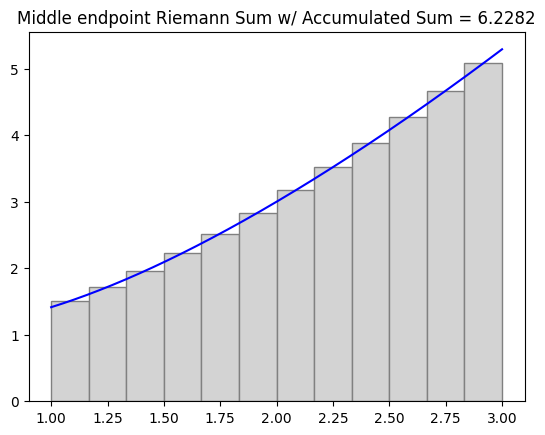

In [4]:
# Midpoint version
riemann(1, 3, fn, how='Middle', num_steps=12, plot=True)

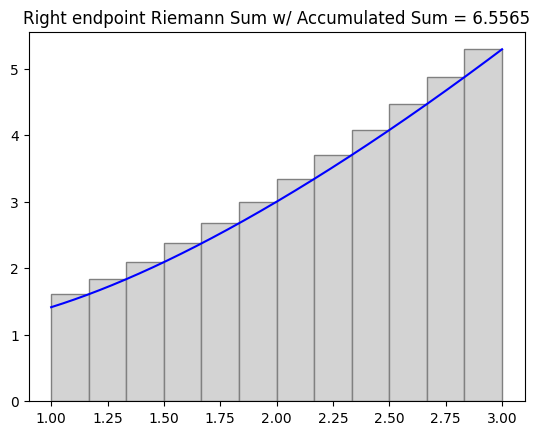

In [5]:
# Right endpoint version
riemann(1, 3, fn, how='Right', num_steps=12, plot=True)

In [6]:
# Toggling off the plotting and reporting sums for each
riemann(1, 3, fn, how='Left', num_steps=12, plot=False)

Left endpoint Riemann Sum ::: 5.910301618984682 with 12 subintervals.


In [7]:
riemann(1, 3, fn, how='Middle', num_steps=12, plot=False)

Middle endpoint Riemann Sum ::: 6.228234866190522 with 12 subintervals.


In [8]:
riemann(1, 3, fn, how='Right', num_steps=12, plot=False)

Right endpoint Riemann Sum ::: 6.556516462277363 with 12 subintervals.


## Questions 4-12

In [9]:
# 4a and b
fn = lambda x: np.sqrt(1 + x**3)
subintervals = [40, 400, 4000, 40000, 400000, 4000000]
for i in subintervals:
    riemann(1, 3, fn, how='Left', num_steps=i, plot=False)

Left endpoint Riemann Sum ::: 6.133337696563011 with 40 subintervals.
Left endpoint Riemann Sum ::: 6.220269270650224 with 400 subintervals.
Left endpoint Riemann Sum ::: 6.228990096672928 with 4000 subintervals.
Left endpoint Riemann Sum ::: 6.229862455971611 with 40000 subintervals.
Left endpoint Riemann Sum ::: 6.2299496946396795 with 400000 subintervals.
Left endpoint Riemann Sum ::: 6.229958419169753 with 4000000 subintervals.


The sequence has stabilized to three decimal places at 6.229. The numerical value of the limit is accurate to four decimal places at 6.2299 with 400,000 subintervals of accumulation.

In [10]:
# 4c
for i in subintervals:
    riemann(3, 7, fn, how='Left', num_steps=i, plot=False)

Left endpoint Riemann Sum ::: 45.15840131308279 with 40 subintervals.
Left endpoint Riemann Sum ::: 45.75374480731908 with 400 subintervals.
Left endpoint Riemann Sum ::: 45.813383966332644 with 4000 subintervals.
Left endpoint Riemann Sum ::: 45.819348930324686 with 40000 subintervals.
Left endpoint Riemann Sum ::: 45.81994543667625 with 400000 subintervals.
Left endpoint Riemann Sum ::: 45.820005091980704 with 4000000 subintervals.


The limiting value on the interval [3,7] is 45.819 stable to three decimal places.

In [11]:
# 4d
subintervals = [40, 400, 4000, 40000, 400000, 4000000]
for i in subintervals:
    riemann(1, 7, fn, how='Left', num_steps=i, plot=False)

Left endpoint Riemann Sum ::: 50.77043536517249 with 40 subintervals.
Left endpoint Riemann Sum ::: 51.92152784413185 with 400 subintervals.
Left endpoint Riemann Sum ::: 52.03712188035586 with 4000 subintervals.
Left endpoint Riemann Sum ::: 52.04868613243673 with 40000 subintervals.
Left endpoint Riemann Sum ::: 52.049842606382335 with 400000 subintervals.
Left endpoint Riemann Sum ::: 52.04995825497153 with 4000000 subintervals.


The limiting value on the interval [1,7] is 52.049 stable to three decimal places.

We can see through simple addition that the Riemann sum for the interval [1,7] is the addition of the Riemann sums for the intervals [1,3] and [3,7]:

$$6.229 + 45.819 = 52.048$$

This makes sense because the Riemann sums are measuring the area under the curve, so the decomposition of an interval should equal its composition with the individual Riemann sums are summed.

In [12]:
# 5
for i in subintervals:
    riemann(1, 7, fn, how='Middle', num_steps=i, plot=False)

Middle endpoint Riemann Sum ::: 52.047250818292916 with 40 subintervals.
Middle endpoint Riemann Sum ::: 52.04994389574418 with 400 subintervals.
Middle endpoint Riemann Sum ::: 52.04997083168529 with 4000 subintervals.
Middle endpoint Riemann Sum ::: 52.04997110103173 with 40000 subintervals.
Middle endpoint Riemann Sum ::: 52.04997110397817 with 400000 subintervals.
Middle endpoint Riemann Sum ::: 52.04997110473693 with 4000000 subintervals.


To sample at the middle point, I changed the `how` parameter to 'Middle'. Within the riemann function, I'm using conditional logic to calculate the `y` sample point based on the desired sampling method. For 'Middle' I'm taking $x$ plus `delta_x` divided by 2 (the midpoint of the `delta_x` subinterval), then getting the `y` value for this midpoint in the passed in `func`.

In [13]:
# 6a, b, and c
subintervals = [10, 20, 40, 400, 4000, 40000]
for i in subintervals:
    riemann(1, 3, fn, how='Middle', num_steps=i, plot=False)

Middle endpoint Riemann Sum ::: 6.22747653422589 with 10 subintervals.
Middle endpoint Riemann Sum ::: 6.22933839582054 with 20 subintervals.
Middle endpoint Riemann Sum ::: 6.229804122734282 with 40 subintervals.
Middle endpoint Riemann Sum ::: 6.229957835175769 with 400 subintervals.
Middle endpoint Riemann Sum ::: 6.2299593723566105 with 4000 subintervals.
Middle endpoint Riemann Sum ::: 6.229959387732263 with 40000 subintervals.


Using the midpoint on the interval [1,3] we get 7 decimal points of stabilization at 40,000 subinterval with a limiting value of 6.2299593.

The midpoint method stabilizes to three decimal points after just 40 subintervals. The stable value is 6.299.

This value is the same as the Left Endpoint method, however that method took ~400,000 subintervals to stabilize and this method only took 40.

Based on these calculations, the Midpoint Method is 4 orders of magnitude more efficient than the Left Endpoint Method on the interval [1,3] for the given function.

In [14]:
# 7a and b
subintervals = [10, 20, 40, 400, 4000, 40000, 400000, 4000000]
for i in subintervals:
    riemann(1, 3, fn, how='Right', num_steps=i, plot=False)

Right endpoint Riemann Sum ::: 6.622655272336308 with 10 subintervals.
Right endpoint Riemann Sum ::: 6.425065903281103 with 20 subintervals.
Right endpoint Riemann Sum ::: 6.327202149550815 with 40 subintervals.
Right endpoint Riemann Sum ::: 6.239655715949005 with 400 subintervals.
Right endpoint Riemann Sum ::: 6.230928741202806 with 4000 subintervals.
Right endpoint Riemann Sum ::: 6.2300563204246 with 40000 subintervals.
Right endpoint Riemann Sum ::: 6.2299690810849775 with 400000 subintervals.
Right endpoint Riemann Sum ::: 6.229960357814283 with 4000000 subintervals.


Using the Right Endpoint Method, the limiting value has only stabilized to 1 decimal place. It appears to be 3 until the subintervals are extended out to 4,000,000 when we see the limiting value approach the same limiting value of 6.229 that we saw with the other methods.

Based on these calculations, the Right Endpoint Method is the most inefficient method on the interval [1,3] for the given function.

In [15]:
# 8
fn2 = lambda x: np.sqrt(1 - x**2)
subintervals = [20, 50]
for i in subintervals:
    riemann(-1, 1, fn2, how='Left', num_steps=i, plot=False)

Left endpoint Riemann Sum ::: 1.5522591631241593 with 20 subintervals.
Left endpoint Riemann Sum ::: 1.5660981554514977 with 50 subintervals.


These values are the same as the values of the semicircle on page 314 (in the book).

In [16]:
# 9a and b
fn3 = lambda x: np.sqrt(1 + np.cos(x)**2)
subintervals = [4, 20, 40, 400, 4000, 40000, 400000, 4000000]
for i in subintervals:
    riemann(0, np.pi, fn3, how='Left', num_steps=i, plot=False)

Left endpoint Riemann Sum ::: 3.819943643179836 with 4 subintervals.
Left endpoint Riemann Sum ::: 3.820197789027713 with 20 subintervals.
Left endpoint Riemann Sum ::: 3.820197789027713 with 40 subintervals.
Left endpoint Riemann Sum ::: 3.8201977890277092 with 400 subintervals.
Left endpoint Riemann Sum ::: 3.8201977890276795 with 4000 subintervals.
Left endpoint Riemann Sum ::: 3.820197789027524 with 40000 subintervals.
Left endpoint Riemann Sum ::: 3.820197789025331 with 400000 subintervals.
Left endpoint Riemann Sum ::: 3.8201977890252587 with 4000000 subintervals.


These numbers are in line with the results on page 315-316. The limiting value to 11 decimal places is 3.82019778902 which can achieved after only 40 subintervals.

In [17]:
# 10
fn4 = lambda x: np.sqrt(1 + np.cos(x**2))
subintervals = [10, 100, 1000]
for i in subintervals:
    riemann(0, 4, fn4, how='Left', num_steps=i, plot=False)

Left endpoint Riemann Sum ::: 4.2176535501924395 with 10 subintervals.
Left endpoint Riemann Sum ::: 3.9347501034918624 with 100 subintervals.
Left endpoint Riemann Sum ::: 3.9127322623736944 with 1000 subintervals.


In [18]:
# 11
fn5 = lambda x: np.cos(x) / (1 + x**2)
subintervals = [10, 100, 1000]
for i in subintervals:
    riemann(2, 3, fn5, how='Left', num_steps=i, plot=False)

Left endpoint Riemann Sum ::: -0.10320774749944361 with 10 subintervals.
Left endpoint Riemann Sum ::: -0.10404981921880206 with 100 subintervals.
Left endpoint Riemann Sum ::: -0.10412210833479739 with 1000 subintervals.


The Riemann sums are all negative for this function over the interval [2,3] because the function is negative over this interval. This means that if the Reimann sum is negative over some interval there is more area under the curve in the negative plane than above it.

In [19]:
# 12a and b
fn6 = lambda x: x**3
subintervals = [10, 100, 1000]
for i in subintervals:
    riemann(-2, 2, fn6, how='Middle', num_steps=i, plot=False)

Middle endpoint Riemann Sum ::: -1.3322676295501878e-15 with 10 subintervals.
Middle endpoint Riemann Sum ::: 2.020605904817785e-14 with 100 subintervals.
Middle endpoint Riemann Sum ::: 2.896988204881268e-14 with 1000 subintervals.


In [20]:
for i in subintervals:
    riemann(-2, 2, fn6, how='Left', num_steps=i, plot=False)

Left endpoint Riemann Sum ::: -3.200000000000001 with 10 subintervals.
Left endpoint Riemann Sum ::: -0.3199999999999822 with 100 subintervals.
Left endpoint Riemann Sum ::: -0.03199999999997637 with 1000 subintervals.


Since the function $x^3$ is symmetric in the interval [-2,2] with equal area under the curve in both the negative and positive planes, we see that using the midpoint method, these positive and negative sums exactly cancel out.

If we instead use the left method, we get an initially negative sum with smaller subintervals since the left side of the function is negative—we are capturing more of this negativity with our left side sampling. My hunch is if the tested this with the right method, we would see the opposite result in the positive direction.

In [21]:
for i in subintervals:
    riemann(-2, 2, fn6, how='Right', num_steps=i, plot=False)

Right endpoint Riemann Sum ::: 3.1999999999999993 with 10 subintervals.
Right endpoint Riemann Sum ::: 0.32000000000002005 with 100 subintervals.
Right endpoint Riemann Sum ::: 0.0320000000000243 with 1000 subintervals.


## Summary of each method

As we can see from the above examples, it appears that from a numerical analysis perspective, the Midpoint Method is the preferred method for most situations. One of the main benefits is the efficiency in converging to the limiting value—which can be achieved with orders of magnitude fewer operations relative to the other methods. However, as we saw in the last problem, there could potentially be benefits to the Left or Right method depending on the given function and interval you want to analyze. These two methods allow us to handle negative sums in the interval differently.

In the limit though, all three methods converge so it seems to come down to the number of subintervals you want to use and the amount of compute time needed to achieve a desired level of accuracy.